<a href="https://colab.research.google.com/github/abdelrahmanfekri/Machine-Learning/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yahoofinance

#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yahoofinance as yf

# Read Data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/NSE-Tata-Global-Beverages-Limited.zip (Unzipped Files)/NSE-Tata-Global-Beverages-Limited.csv",parse_dates = ['Date'],index_col = 'Date')

In [4]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


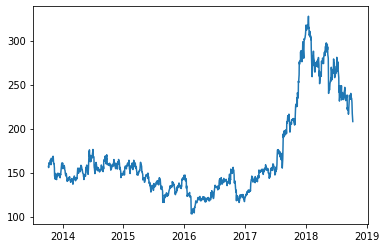

In [5]:
plt.plot(data['Open'])

#Prepare Train data I choosed the last 100 data to be a test data (unseen data)

In [6]:
batch = 30
data = data.sort_index(ascending = True,axis = 0)
scaler = MinMaxScaler(feature_range = (0,1))
closeData = scaler.fit_transform(pd.DataFrame(data['Close'][:-100]))
Xtrain = []
ytrain = []
for i in range(batch,closeData.shape[0]):
  Xtrain.append(closeData[i-batch:i])
  ytrain.append(closeData[i])

ytrain = np.array(ytrain)
Xtrain = np.array(Xtrain)
ytrain.shape,Xtrain.shape

((1105, 1), (1105, 30, 1))

# make the LSTM model for training

In [7]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (batch,1)))
model.add(LSTM(units = 50,return_sequences = True))
model.add(LSTM(units = 50,return_sequences = True))
model.add(LSTM(units = 50))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 32)                1632      
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9

#fitting the model

In [8]:
history = model.fit(Xtrain,ytrain,epochs = 60,batch_size = 30,verbose = 1)

Epoch 1/60
37/37 [==============================] - 12s 38ms/step - loss: 0.0405
Epoch 2/60
37/37 [==============================] - 1s 38ms/step - loss: 0.0035
Epoch 3/60
37/37 [==============================] - 1s 38ms/step - loss: 0.0023
Epoch 4/60
37/37 [==============================] - 1s 35ms/step - loss: 0.0023
Epoch 5/60
37/37 [==============================] - 1s 35ms/step - loss: 0.0022
Epoch 6/60
37/37 [==============================] - 1s 39ms/step - loss: 0.0021
Epoch 7/60
37/37 [==============================] - 1s 39ms/step - loss: 0.0022
Epoch 8/60
37/37 [==============================] - 1s 37ms/step - loss: 0.0021
Epoch 9/60
37/37 [==============================] - 1s 35ms/step - loss: 0.0020
Epoch 10/60
37/37 [==============================] - 1s 36ms/step - loss: 0.0018
Epoch 11/60
37/37 [==============================] - 1s 36ms/step - loss: 0.0016
Epoch 12/60
37/37 [==============================] - 1s 35ms/step - loss: 0.0018
Epoch 13/60
37/37 [=================

# prepare the unseen data 

In [9]:
closeDataTest = scaler.transform(pd.DataFrame(data['Close'][-160:]))
Xtest = []
for i in range(batch,closeDataTest.shape[0]):
  Xtest.append(closeDataTest[i-batch:i])
Xtest = np.array(Xtest)
pred = model.predict(Xtest)
pred = scaler.inverse_transform(pred)

In [10]:
da = pd.DataFrame()
da['Actual'] = data['Close'][-130:]
da['Prediction'] = np.squeeze(pred)

# Evaluate the model in the test data and waow we make a model the almost predict the Stock market

In [11]:
from keras.metrics import mean_absolute_error
abs(da['Actual']-da['Prediction']).mean()

7.9885654390775205

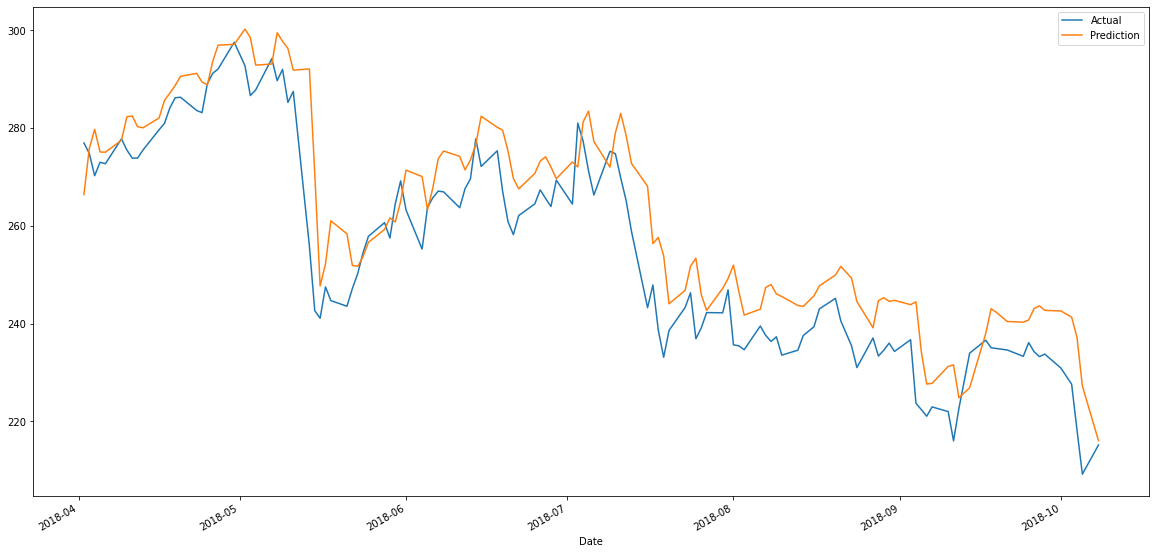

In [12]:
da.plot(figsize = (20,10))